In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
#Loading the dataset 
url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=sample_submission.csv"
data = pd.read_csv('train.csv') 

In [36]:
#Displaying the first 5 rows of the dataset 
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [37]:
#Selecting relevant features. 
features = ['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt']

#Creating a new DataFrame with the selected features. 
df = data[features]

In [38]:
#Checking for the missing values. 
print(df.isnull().sum())

SalePrice       0
GrLivArea       0
BedroomAbvGr    0
FullBath        0
YearBuilt       0
dtype: int64


In [39]:
#Splitting the dataset into training and testing sets (80% train, 20% test).
x = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']] #Features
y = df['SalePrice'] #Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
#Initializing and training the Linear Regression model.
model = LinearRegression() 
model.fit(x_train, y_train)  

LinearRegression()

In [41]:
#Making predictions on the test set. 
y_pred = model.predict(x_test)

In [42]:
#Calculating the metrics.  
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 35788.0612924363
MSE: 2806426667.247853
R-squared: 0.6341189942328371


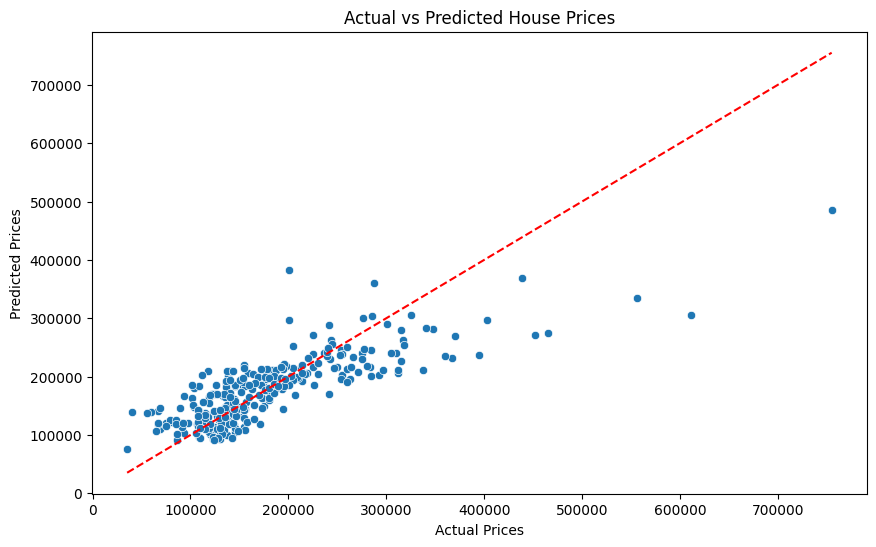

In [44]:
#PLotting the results.  
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--')
plt.show()